# Project of Data Preprocessing section

import Pandas and Nympy libraries:

In [6]:
import pandas as pd
import numpy as np

import also "matplotlib" library:

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1.0 Open Data sets and checking the general information:

read csv file

In [368]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/credit_scoring_eng.csv')

check header

In [189]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [160]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [190]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


Count of all columns should be 21525, but in "days_employed" and "total_income" less - 19351.00. Looks like this columns contain missing values. 

Next step - check and sum missing values in columns

In [191]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Check types of columns

In [192]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

## 2.1 Identify and fill missing values:

Columns - "days_employed" and "total_income" should be integer type. Need to change type of this columns. 

Let's put attention to first column with missing values - "days_employed". 

In [193]:
df.days_employed.describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [194]:
df['days_employed'].unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

Another check:

In [195]:
df.days_employed.unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

In simple case, need to fill all missed values in "days_employed" by mean values:

Text(0.5, 1.0, 'Days Employed (before changes)')

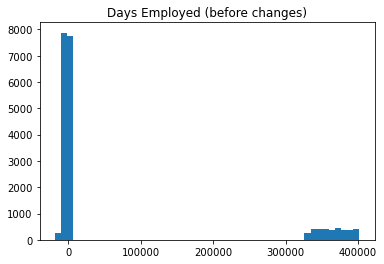

In [197]:
plt.hist(df.days_employed, bins = 50)
plt.title('Days Employed (before changes)')

In [198]:
years = 401755 / 365
print("Maximum Days Employed divided to 365 days: {:.0f} years".format(years))

Maximum Days Employed divided to 365 days: 1101 years


Very big amount. It is mean, that we can skip all above zero. And all negative values by using abs method need to modify to positive values. 

In [199]:
df['days_employed'] = np.where(df.days_employed>0, np.nan, df.days_employed.abs())
df['days_employed'].unique()

array([8437.67302776, 4024.80375385, 5623.42261023, ..., 2113.3468877 ,
       3112.4817052 , 1984.50758853])

In [201]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Text(0.5, 1.0, 'Days Employed (after changes)')

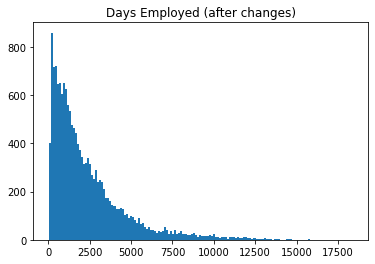

In [202]:
plt.hist(df.days_employed, bins = 150)
plt.title('Days Employed (after changes)')

In [203]:
df.days_employed.isnull().sum()

5619

Check column "Days Employed" for missing values: 

In [204]:
missing_values_of_days_employed = df.days_employed.isnull().sum()
print("Missing values of column - Days Employed:",missing_values_of_days_employed)

Missing values of column - Days Employed: 5619


Now need to fill missing values in Days Employed by mean value:

In [208]:
df.days_employed.fillna(df.days_employed.mean(),inplace=True)
df.days_employed.unique()

array([8437.67302776, 4024.80375385, 5623.42261023, ..., 2113.3468877 ,
       3112.4817052 , 1984.50758853])

Next column - "total_income":

Text(0.5, 1.0, 'Total Income')

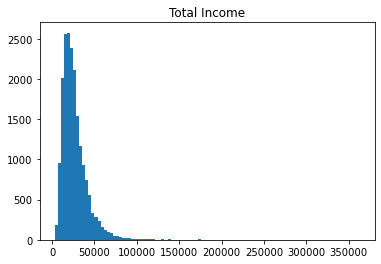

In [209]:
plt.hist(df.total_income, bins = 100)
plt.title('Total Income')

Need to fill missing values by mean value:

In [210]:
df.total_income.fillna(df.total_income.mean(),inplace=True)

Check by isnull method and sum all missing values again, for all columns:

In [211]:
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Conclusion: columns "Days Employed" and "Total Income" have missing values. 

## 2.2 Data types replacement:

In [212]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

For check uppercase and lowercase, need to check all columns with type = 'object':

// need to create function with the following code:

In [213]:
for objects in df.select_dtypes(include = 'object').columns:
    print(objects)
    print(df[objects].value_counts())

education
secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64
family_status
married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64
gender
F      14236
M       7288
XNA        1
Name: gender, dtype: int64
income_type
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            

In [214]:
df['education'] = df['education'].str.lower()
#df['purpose']   = df['purpose'].str.lower()
#df['income_type'] = df['income_type'].str.lower()

Another task - need to change types of 'Days Employed' and 'Total Income' from float to integer:

In [215]:
df['days_employed'] = df['days_employed'].astype(int)
df['total_income'] = df['total_income'].astype(int)

In [216]:
df.dtypes

children             int64
days_employed        int32
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int32
purpose             object
dtype: object

In [217]:
df['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

## 2.3 Processing duplicates:

Check duplicates in table:

In [222]:
df.duplicated().sum()

71

let's take a closer look at all these duplicate values:

In [223]:
df[df.duplicated()==True].describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,71.000000,71.0,71.000000,71.000000,71.000000,71.0,71.0
mean,0.225352,2353.0,49.985915,0.859155,0.563380,0.0,26787.0
std,0.512617,0.0,11.991060,0.350338,0.890143,0.0,0.0
min,0.000000,2353.0,23.000000,0.000000,0.000000,0.0,26787.0
25%,0.000000,2353.0,41.000000,1.000000,0.000000,0.0,26787.0
50%,0.000000,2353.0,54.000000,1.000000,0.000000,0.0,26787.0
75%,0.000000,2353.0,58.500000,1.000000,1.000000,0.0,26787.0
max,2.000000,2353.0,71.000000,1.000000,4.000000,0.0,26787.0


Small check table before start remove duplicate values:

In [224]:
print(df.shape)

(21525, 12)


Remove duplicate values:

In [225]:
df.drop_duplicates(inplace=True)

If we check number of rows, then is should decrease:

In [227]:
print(df.shape)

(21454, 12)


## 2.4 Categorize the data:

Added 3 new columns, to categorize data:

In [282]:
df['married_flag'] = df.family_status=='married'
df['kids_flag'] = df.children > 0

In [287]:
df.married_flag.describe()

count     21525
unique        2
top        True
freq      12380
Name: married_flag, dtype: object

In [283]:
df.total_income.describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

I can categorize column 'total_income':

In [377]:
df['income_bin'] = pd.cut(df.total_income, [0,17219,24966,362496.645])

In [379]:
df['income_bin'].value_counts()

(24966.0, 362496.645]    8625
(17219.0, 24966.0]       5363
(0.0, 17219.0]           5363
Name: income_bin, dtype: int64

In [369]:
def calc_income_lev(value):
    if value in range (0,17219,1):
        return 'low income'
    if value in range (17219,24966,1):
        return 'middle income'
    if value in range (362496,50000,1):
        return 'hign income'

In [373]:
df['income_levels'] = df.total_income.apply(calc_income_lev)

In [374]:
df.income_levels.value_counts()

middle income    3
low income       2
Name: income_levels, dtype: int64

In [317]:
df['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
housing transactions                        653
buying property for renting out             653
transactions with commercial real estate    651
housing                                     647
purchase of the house                       647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

In [265]:
def purpose_define(value):
    if 'wedding' in value:
        return 'money for wedding'
    if 'real estate' in value or 'property' in value or 'hous' in value:
        return 'money for house'
    if 'educat' in value or 'university' in value:
        return 'money for education'
    if 'car' in value:
        return 'money for car'
    else:
        return 'money for something else'

In [266]:
df['purpose_types'] = df.purpose.apply(purpose_define)

In [267]:
df['purpose_types'].value_counts()

money for house        10840
money for car           4315
money for education     4022
money for wedding       2348
Name: purpose_types, dtype: int64

In [308]:
def percent_calc(value):
    rate = value.sum() / value.count()
    print('Percentage of {:.2%}'.format(rate))
    return rate

In [322]:
df.groupby('married_flag').debt.apply(percent_calc)

Percentage of 8.86%
Percentage of 7.52%


married_flag
False    0.088573
True     0.075202
Name: debt, dtype: float64

In [311]:
df.groupby('kids_flag').debt.apply(percent_calc)

Percentage of 7.50%
Percentage of 9.24%


kids_flag
False    0.074951
True     0.092373
Name: debt, dtype: float64

In [380]:
df.groupby('income_bin').debt.apply(percent_calc)

Percentage of 7.96%
Percentage of 8.73%
Percentage of 7.84%


income_bin
(0.0, 17219.0]           0.079620
(17219.0, 24966.0]       0.087265
(24966.0, 362496.645]    0.078377
Name: debt, dtype: float64

Percentage of 7.96%
Percentage of 8.73%
Percentage of 7.84%


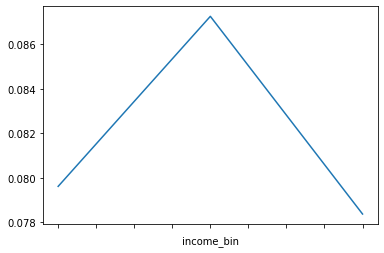

In [381]:
df.groupby('income_bin').debt.apply(percent_calc).plot()

In [320]:
df.groupby('purpose_types').debt.apply(percent_calc)

Percentage of 9.34%
Percentage of 9.20%
Percentage of 7.21%
Percentage of 7.92%


purpose_types
money for car          0.093395
money for education    0.091994
money for house        0.072140
money for wedding      0.079216
Name: debt, dtype: float64

Percentage of 9.34%
Percentage of 9.20%
Percentage of 7.21%
Percentage of 7.92%


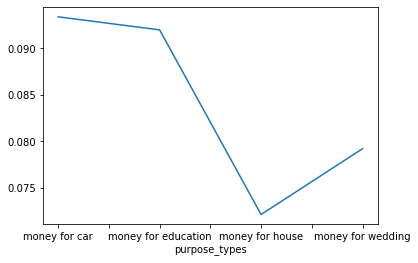

In [321]:
df.groupby('purpose_types').debt.apply(percent_calc).plot()

## 3.0 Answers on questions:

- **Is there a connection between having kids and repaying a loan on time?** <br> If look only at digital data, then in the presence of children, most often they return the debt on time (***7.5%***), then without kids (***9.24%***).

- **Is there a connection between marital status and repaying a loan on time?** <br> Married people repaying a loan on time (***8.86%***) than unmarried people (***7.52%***).


- **Is there a connection between income level and repaying a loan on time?** <br> I can make that the input income does not affect to repaying a loan on time. The percentage of non-repaying a loan on tine is approximately the same for all income levels. (***low level - 7.96%, middle level - 8.73%, high level - 7.84%***)

- **How do different loan purposes affect on-time loan repayment?** <br> Those who take out a loan to buy a "car" (***9.34%***) or study (education) - ***9.20%*** have a higher level of risk of not repaying the loan on time. In third place, people who take money for a wedding (***7.92%***). The minimum chance of late repayment of the loan from those people who take money for the category of the "house" (***7.21%***). <br> In this case, I would divide people into 2 categories:
1. Perhaps younger and less serious about money.
2. More adults or those who are more serious about shopping and spending money.

## 4.0 Conclusion:

Judging by the categories of the presence of "Children" and the category of the "Purposes", the main clients who do not repay the loan on time are people who do not want to bear much responsibility. Clients without children and with the purpose of buying a car have the highest percentage of delays in timely loan repayment, 9.24% and 9.34% accordingly. These may not be necessarily young people, but suggest such an idea that a large percentage of people who have a goal - "Education", which means they are young enough. For a more detailed consideration, more data is also needed.